In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
from scipy import stats as ss

In [2]:
df = pd.read_csv('searches.tsv', sep = "\t")

In [3]:
df.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [5]:
df['filter_room_types'].fillna('Nan' , inplace = True)

In [6]:
filter_room_types = []
for i in df['filter_room_types']:
    a = i.split(',')
    for j in a:
        if j == "":
            a.remove(j)
    filter_room_types.append(list(set(a)))

In [7]:
df['filter_room_types'] = filter_room_types

In [8]:
df['filter_room_types'].value_counts()

[Nan]                                           19546
[Entire home/apt]                                9998
[Private room]                                   2840
[Entire home/apt, Private room]                  2404
[Entire home/apt, Private room, Shared room]      460
[Private room, Shared room]                       260
[Shared room]                                     128
[Entire home/apt, Shared room]                    101
Name: filter_room_types, dtype: int64

In [9]:
def replaceNan(x):
    if len(x)>1:
        return ",".join(x)
    else:
        return x[0]

In [10]:
df['filter_room_types'] = df['filter_room_types'].apply(replaceNan)

In [11]:
df['filter_room_types'].replace('Nan' , np.nan , inplace = True)

In [12]:
df['filter_room_types'].value_counts()

Entire home/apt                             9998
Private room                                2840
Entire home/apt,Private room                2404
Entire home/apt,Private room,Shared room     460
Private room,Shared room                     260
Shared room                                  128
Entire home/apt,Shared room                  101
Name: filter_room_types, dtype: int64

In [13]:
df['filter_neighborhoods'].fillna('Nan' , inplace = True)

In [14]:
filter_neighborhoods = []
for i in df['filter_neighborhoods']:
    a = i.split(',')
    for j in a:
        if j == "":
            a.remove(j)
    filter_neighborhoods.append(a[0])

In [15]:
df['filter_neighborhoods'] = filter_neighborhoods

In [16]:
df['filter_neighborhoods'].value_counts().head(10)

Nan                       34391
City Centre                1049
Temple Bar                   52
Ballsbridge                  46
Old City                     27
Docklands                    27
Ranelagh and Rathmines       26
Blackrock                    11
Kilmainham                    9
Donnybrook                    8
Name: filter_neighborhoods, dtype: int64

In [17]:
df['filter_neighborhoods'].replace('Nan' , np.nan , inplace = True)

In [18]:
to_datetime = ['ds','ds_checkin','ds_checkout']

In [19]:
for i in to_datetime:
    df[i] = pd.to_datetime(df[i])

In [20]:
df['id_user'] = df['id_user'].str.upper()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: datetime64[ns

In [22]:
df.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000AF0A-6F26-4233-9832-27EFBFB36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,"Entire home/apt,Private room",NaN
1,2014-10-01,0000AF0A-6F26-4233-9832-27EFBFB36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000CD9D3-E05B-4016-9E09-34A6F8BA2FC5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000CD9D3-E05B-4016-9E09-34A6F8BA2FC5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,Entire home/apt,NaN
4,2014-10-01,001C04F0-5A94-4EE0-BF5D-3591265256DE,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [23]:
neighbors_searches = df.groupby('filter_neighborhoods')[['n_searches']].sum().reset_index()

In [24]:
neighbors_searches = neighbors_searches.sort_values(by = 'n_searches' , ascending = False).head()

In [25]:
neighbors_searches

,filter_neighborhoods,n_searches
8,City Centre,18819
3,Ballsbridge,991
39,Temple Bar,499
31,Ranelagh and Rathmines,477
27,Old City,364


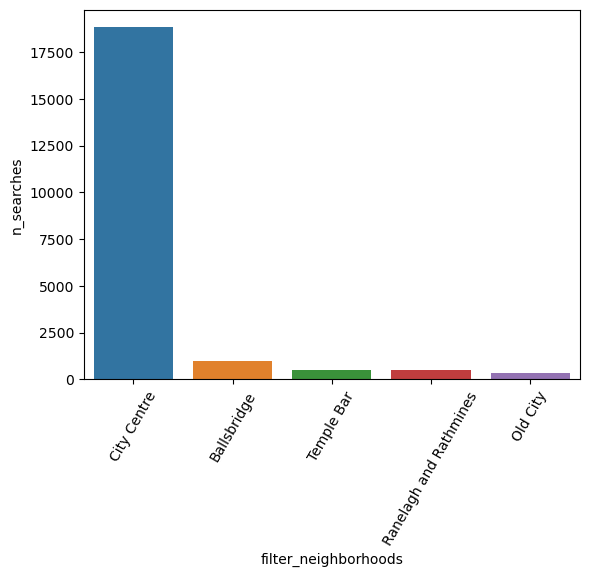

In [26]:
sns.barplot(x = 'filter_neighborhoods' , y = 'n_searches' , data = neighbors_searches)
plt.xticks(rotation = 60)
plt.show()

In [27]:
roomtypes_searches = df.groupby('filter_room_types')[['n_searches']].count().reset_index()

In [28]:
roomtypes_searches = roomtypes_searches.sort_values(by = 'n_searches' , ascending = False).head()

In [29]:
roomtypes_searches

,filter_room_types,n_searches
0,Entire home/apt,9998
4,Private room,2840
1,"Entire home/apt,Private room",2404
2,"Entire home/apt,Private room,Shared room",460
5,"Private room,Shared room",260


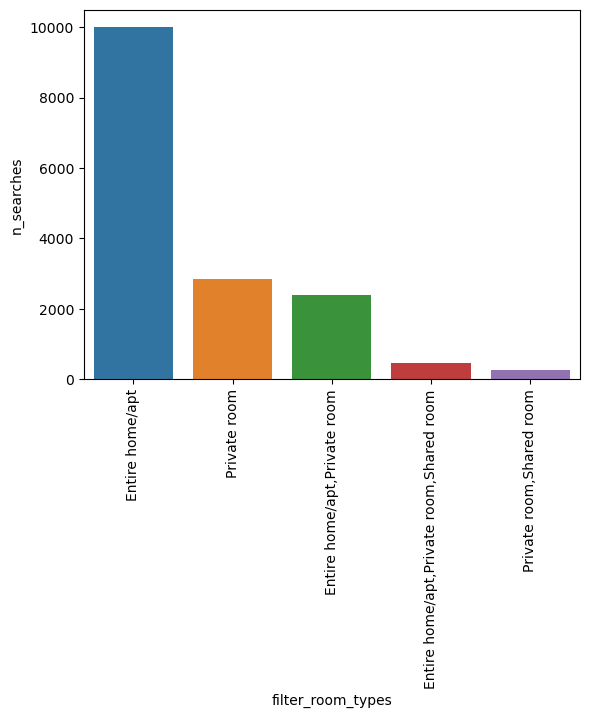

In [30]:
sns.barplot(x = 'filter_room_types' , y = 'n_searches' , data = roomtypes_searches)
plt.xticks(rotation = 90)
plt.show()

Most of the room types requested were entire home/apt and private rooms sometimes shared rooms.If given more time,I would have cleaned this column since most filter values are repeated within the same cell. On the Airbnb website, there are only 4 values in the type of place:

•	Entire Place

•	Private Room

•	Hotel Room

•	Shared Room

So searching how often these 4 strings occur would be how I go about it.

In [31]:
import pycountry
def get_country_name(country_code):
    try:
        country = pycountry.countries.get(alpha_2 = country_code)
        return country.name
    except AttributeError:
        return country_code

In [32]:
df['origin_country'] = df['origin_country'].apply(get_country_name)

In [33]:
df.drop(columns=["filter_neighborhoods" ] ,axis = 1, inplace = True)

In [34]:
df['length_preperation'] = df[ 'ds_checkin' ] - df[ 'ds' ]

#### Distributions

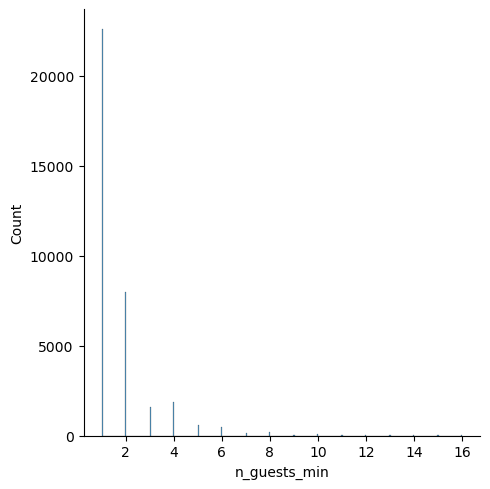

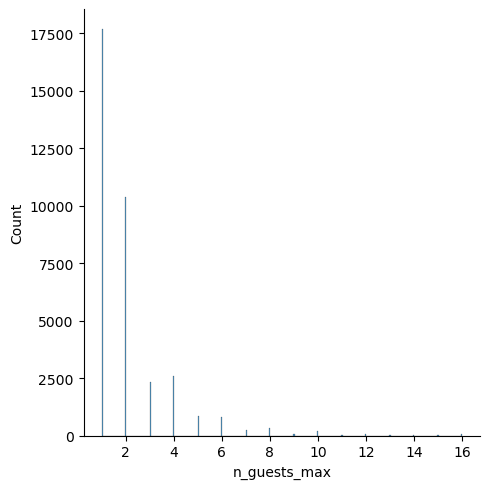

In [35]:
#Distribution plot of n_guests min and n_guests max 
sns.displot(df, x = "n_guests_min") 
sns.displot(df , x = "n_guests_max") 
plt.show()

Both have similar distributions with 1 being the most popular option and 2 being the next popular option.

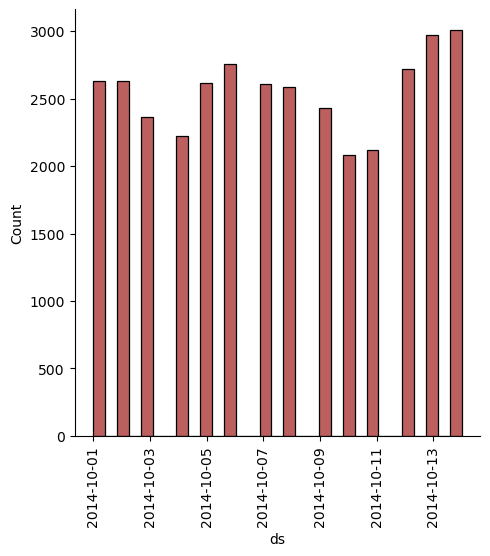

In [36]:
#When were searches conducted
ax = sns.displot(df, x = 'ds' , color = 'brown' )
plt.xticks(rotation = 90)
plt.show()

Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates.

In [37]:
#Percentage of dataset with a  above 600
print(len(df[df[ 'filter_price_max' ] > 600]) / len(df['filter_price_max']) * 100 , '%')

5.311022189887232 %


In [38]:
# Removing the set upper limit 
searches_maxprice_removed = df[df['filter_price_max'] <= 600]

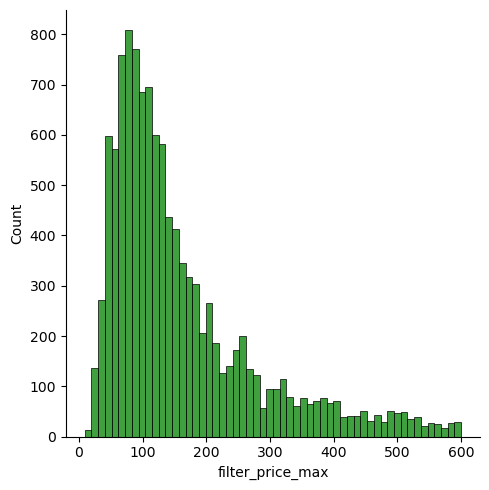

In [39]:
# Distribution plot of filler_price_max column
sns.displot(x = searches_maxprice_removed['filter_price_max'] , color = 'green')
plt.show()

Filter_price_max was chosen instead of filter_price_min due to the min usually being set at $0

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600.

In [40]:
#Distribution of Length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = df["length_preperation"] / np.timedelta64(1,'D')
print(len(distribution[distribution > 100]) / len(distribution) * 100 , '%\n')

9.396423874415872 %



In [41]:
# Remove values more than 100 days
distribution = distribution[distribution < 100]

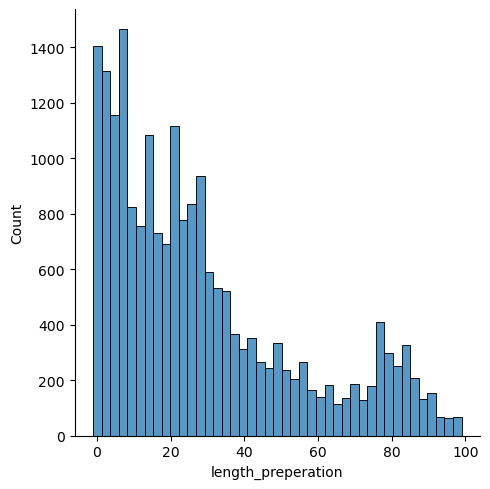

In [42]:
sns.displot(x = distribution )
plt.show()

100 days was chosen as the limit since only 14.06% of the dataset exists beyond that.

In [43]:
# Distributions of n_nights of searches

# percentage of dataset morethan 20 nights
print(len(df[df['n_nights'] > 20]) / len(df['n_nights']) * 100 , '%')

4.737387021854101 %


In [44]:
# Remove n_nights morethan 20 nights
searches_within_20 = df[df['n_nights'] < 20]

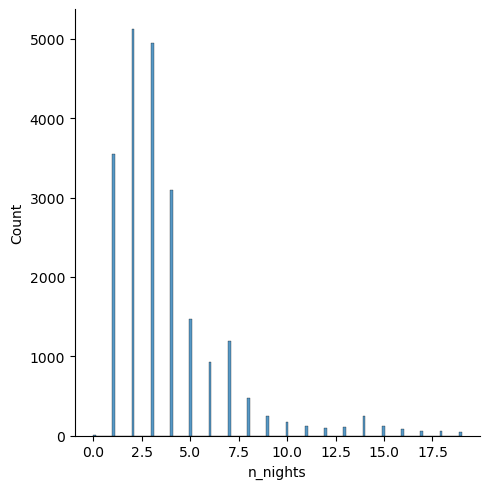

In [45]:
#Distribution plot of n_nights column
sns.displot(searches_within_20 , x = 'n_nights' )
plt.show()

Removing n_nights beyond 20 days since only 7.3% of the dataset exists beyond 20 days

In [46]:
# Distribution of months of ds_checkin of searches
checkin_month = pd.DatetimeIndex(df['ds_checkin']).month

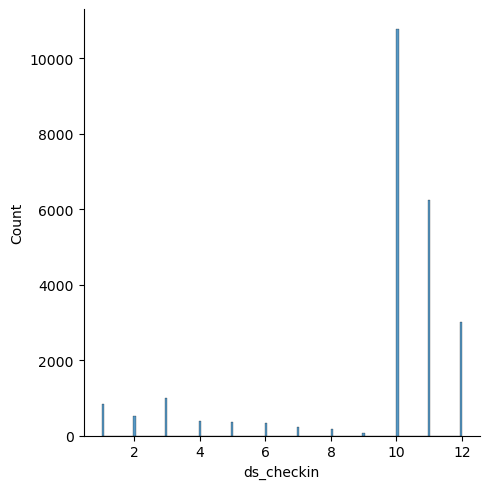

In [47]:
# Distribution plot ds_checkin column
sns.displot(checkin_month)
plt.show()

Used only the check-in month, cause checkout is usually within 5/6 days. The mean of n_nights after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout.

In [48]:
#Find top 15 countries where searches originate from
#Group by origin country and finding the count of each country
search_origin = df.groupby(["origin_country"])[['origin_country']].count()

In [49]:
search_origin.rename(columns = {'origin_country' : 'count'} , inplace = True)

In [50]:
search_origin = search_origin.sort_values(by = 'count' , ascending= False)

In [51]:
search_origin.head(15)

,count
origin_country,
Ireland,6608
United States,5811
United Kingdom,4832
France,3444
Italy,2333
Germany,2170
Spain,1759
Canada,1085
Australia,962
